# Exploratory Data Analytics - Retail

< explanation

## Importing Basic Packages and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Data Cleaning and Transformation

In [3]:
#checking for missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values found.

In [4]:
#checking for duplicated rows
df.duplicated().sum()

17

There are 17 duplicated rows.

In [5]:
#viewing the duplicated rows
df.loc[df.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [6]:
#dropping duplicated rows.
df.drop_duplicates(inplace=True)
#check duplicated rows again.
df.duplicated().sum()

0

Duplicated rows were dropped.

In [7]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


All columns have the correct data types. Although "Postal Code" is better if the data type is string.

In [8]:
#changing "Postal Code" column to string
df['Postal Code'] = df['Postal Code'].astype('str')
df.info() #checking datatypes again

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


Data type of "Postal Code" was changed. 

In [9]:
#viewing the dataframe
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Checking the data on each columns

In [10]:
#checking the unique values on each column
print('Ship mode:')
print(df['Ship Mode'].unique(),'\n')

print('Segment')
print(df['Segment'].unique(),'\n')

print('Country')
print(df['Country'].unique(),'\n')

print('State')
print(df['State'].unique(),'\n')

print('Region')
print(df['Region'].unique(),'\n')

print('Category')
print(df['Category'].unique(),'\n')

print('Sub-Category')
print(df['Sub-Category'].unique())

Ship mode:
['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Segment
['Consumer' 'Corporate' 'Home Office'] 

Country
['United States'] 

State
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia'] 

Region
['South' 'West' 'Central' 'East'] 

Category
['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Faste

In [11]:
print('Postal Code')
print(df['Postal Code'].unique())

Postal Code
['42420' '90036' '33311' '90032' '28027' '98103' '76106' '53711' '84084'
 '94109' '68025' '19140' '84057' '90049' '77095' '75080' '77041' '60540'
 '32935' '55122' '48185' '19901' '47150' '10024' '12180' '90004' '60610'
 '85234' '22153' '10009' '49201' '38109' '77070' '35601' '94122' '27707'
 '60623' '29203' '55901' '55407' '97206' '55106' '80013' '28205' '60462'
 '10035' '50322' '43229' '37620' '19805' '61701' '85023' '95661' '64055'
 '91104' '43055' '53132' '85254' '95123' '98105' '98115' '73034' '90045'
 '19134' '88220' '78207' '77036' '62521' '71203' '6824' '75051' '92374'
 '45011' '7090' '19120' '44312' '80219' '75220' '37064' '90604' '48601'
 '44256' '43017' '48227' '38401' '33614' '95051' '55044' '92037' '77506'
 '94513' '27514' '7960' '45231' '94110' '90301' '33319' '80906' '7109'
 '48180' '8701' '22204' '80004' '7601' '33710' '19143' '90805' '92345'
 '37130' '84041' '78745' '1852' '31907' '6040' '78550' '85705' '62301'
 '2038' '33024' '98198' '61604' '89115' '2886' 

In [12]:
print('City')
print(df['City'].unique())

City
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Peters

### Performing Basic Statistics Chaeck

In [13]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


There is a maximum value of 22638.48 on Sales and on Profits has a -6599.97 and 8399.97 as values. These seem to be outliers.

### Plotting the values to view outliers

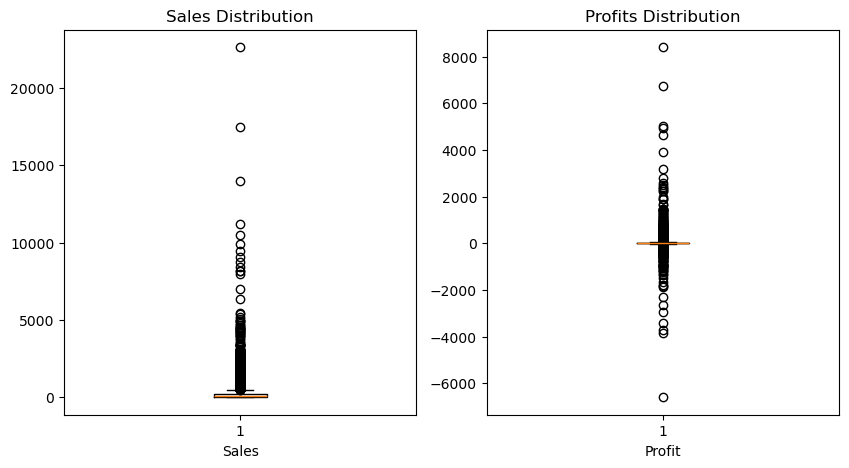

In [14]:
#creating plot object
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#plot using
axes[0].boxplot(df['Sales'])
axes[0].set_title('Sales Distribution')
axes[0].set_xlabel('Sales')

axes[1].boxplot(df['Profit'])
axes[1].set_title('Profits Distribution')
axes[1].set_xlabel('Profit')

plt.show()

#### Ploting Histogram

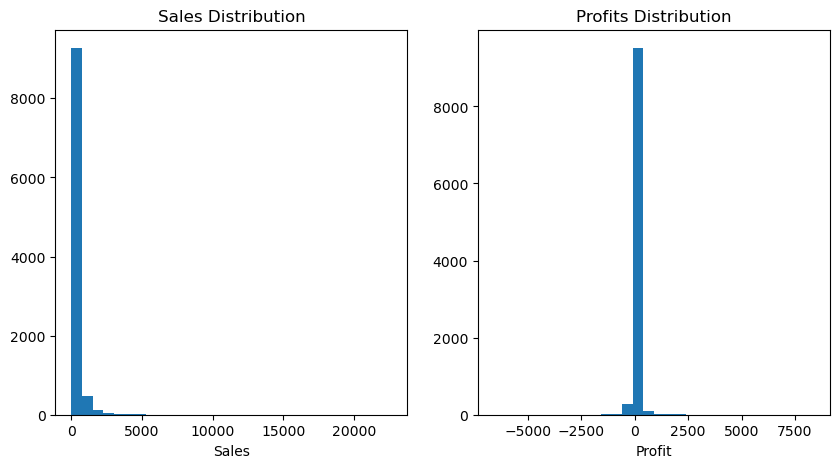

In [15]:
#creating plot object
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#plot using
ax[0].hist(df['Sales'], bins=30)
ax[0].set_title('Sales Distribution')
ax[0].set_xlabel('Sales')

ax[1].hist(df['Profit'], bins=30)
ax[1].set_title('Profits Distribution')
ax[1].set_xlabel('Profit')

plt.show()

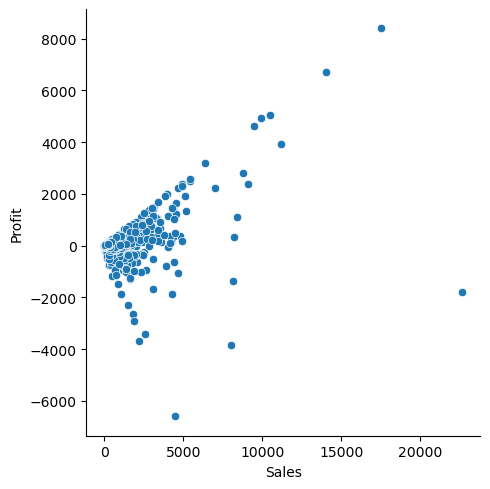

In [20]:

sns.relplot(data=df, x='Sales', y='Profit')
plt.show()

There is something unusual with the data. The fact that there is a sales that is more than 20,000 and profit is below zero. We will ignore the supposed outliers and include all data to later analysis. 

### Exporting the data.

The cleaning and transformation is finished for now. We will export the data and will use Tableau to further analyse the data. 

In [21]:
#export data as csv
#df.to_csv('Cleaned_SampleSuperstore.csv')